# How environmental conditions influence shark presence and shark absence

In [1]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy
import statsmodels.formula.api as smf 

In [2]:
# Read in the dataset and do some quick data cleanup.
dat = pd.read_csv('D:/Documents/SpringBoard/capstone-1/datasets/final_files/combined/'
                  'filled/jackknifed_counts.csv', 
                 parse_dates=['Date']) 

dat['Receiver_D'] = dat['Receiver_D'].astype('category') # turn receiver D into a category
    # for analyses and plotting
dat['Year'] = dat['Year'].astype('category') # turn into a category
dat['Transmitter'] = pd.to_numeric(dat['Transmitter'], errors='coerce') # and make
    # sure that the 'Transmitter' (shark density) is numeric
    
dat['Receiver_D'] = dat['Receiver_D'].cat.remove_unused_categories()

In [3]:
dat['presence'] = dat['Transmitter'].copy() # make a copy of the transmitter data
dat['presence'].values[dat['presence'].values > 1] = 1 # and convert transmitter vals > 1
    # to 1
dat['presence'] = dat['presence'].astype('category') # convert to category so
    # that we can run some t-tests

In [4]:
# Split into two datasets so that we can easily run some t-tests
sharks = dat[dat['presence'] == 1] # sharks are there if the presence is 1
nosharks = dat[dat['presence'] == 0] # no sharks if presence is 0

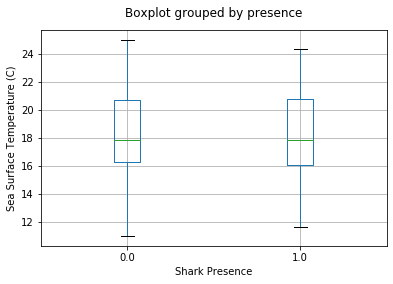

               mean       std
presence                     
0.0       18.391508  2.649823
1.0       18.312694  2.812262
Ttest_indResult(statistic=-1.8238732101088118, pvalue=0.06817584650347171)


In [5]:
# Plot the temperature ranges for shark presence vs absence
dat.boxplot('TempC', 'presence') #
plt.xlabel('Shark Presence')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('')
plt.show()

# Print some descriptive stats
print(dat.groupby('presence')['TempC'].describe().loc[:,['mean','std']])

# Print the t-test result
print(scipy.stats.ttest_ind(sharks.TempC, nosharks.TempC))

There is no significant difference in temperature values when sharks are present compared to when they are not present.

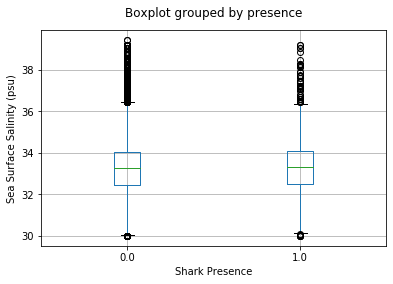

               mean       std
presence                     
0.0       33.287827  1.343819
1.0       33.292160  1.272818
Ttest_indResult(statistic=0.19917073909870342, pvalue=0.8421298126050738)


In [6]:
# Plot the salinity ranges for presence vs absence
dat.boxplot('Sal', 'presence')
plt.xlabel('Shark Presence')
plt.ylabel('Sea Surface Salinity (psu)')
plt.title('')
plt.show()

# Print some descriptive statistics
print(dat.groupby('presence')['Sal'].describe().loc[:,['mean','std']])

# Print the results of a t-test.
print(scipy.stats.ttest_ind(sharks.Sal, nosharks.Sal))

There is no significant difference in salinity values when sharks are present compared to when they are not present.

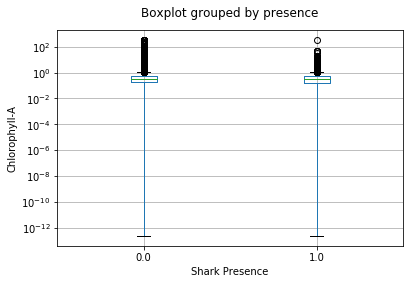

              mean       std
presence                    
0.0       0.859213  7.495075
1.0       0.724956  5.455596
Ttest_indResult(statistic=-1.1192727942738003, pvalue=0.2630279275348308)


In [7]:
# Plot the difference in Chlorophyll-A when sharks are present and not present
dat.boxplot('ChlA', 'presence')
plt.yscale('log')
plt.xlabel('Shark Presence')
plt.ylabel('Chlorophyll-A')
plt.title('')
plt.show()

# Print some descriptive statistics
print(dat.groupby('presence')['ChlA'].describe().loc[:,['mean','std']])

# Print the results of a t-test
print(scipy.stats.ttest_ind(sharks.ChlA, nosharks.ChlA))

There is no significant difference in Chlorophyll-A values when sharks are present compared to when they are not present.

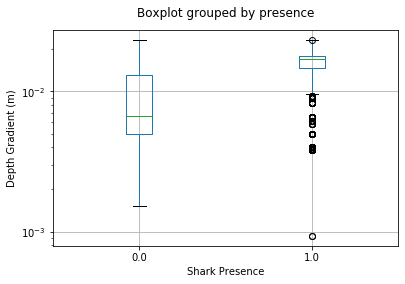

              mean       std
presence                    
0.0       0.008718  0.004951
1.0       0.015467  0.004195
Ttest_indResult(statistic=84.66941929786385, pvalue=0.0)


In [8]:
# Plot the relationship between shark presence and depth gradient
dat.boxplot('DepthGradient', 'presence')
plt.yscale('log')
plt.xlabel('Shark Presence')
plt.ylabel('Depth Gradient (m)')
plt.title('')
plt.show()

# Print some descriptive stats
print(dat.groupby('presence')['DepthGradient'].describe().loc[:,['mean','std']])

# Print the results of a t-test
print(scipy.stats.ttest_ind(sharks.DepthGradient, nosharks.DepthGradient))

There is a significant difference in depth gradient values when sharks are present compared to when they are not present. It appears that sharks are present over sands that have steeper slopes.